In [1]:
from pathlib import Path
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import chi2, chi2_contingency, contingency

## Read data 

### DPE data

In [3]:
u_wall_min = 0.5
u_wall_max = 1.11
u_roof_min = 0.4
u_roof_max = 2.3

In [4]:
# path = r"U:\WORK\assembled_same_U\with_complete_dpe_data\all\dpe_all3-len_185528-P3-P-HABITAT-FRANCE-toit.csv"

In [5]:
path = r"E:\Paendora2\Paendora2_data\gpd_sorting_output\concat_archetypes\joining_after_final_selection\assembled_by_roof_and_rock_wall\len_1995870-P3-P-HABITAT-FRANCE-toit.csv"

In [6]:
pop = pd.read_csv(path, index_col=0)

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,20,21,22,24,25,30,31,36,49,50,51,52,53,54,55,56,74,126,127,129,131,132,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,153,154,156,157,158,159,161,162,163,164,167,168,169,171,172,173,174,192,194,198,199,200,204,221,247,249,250,294,298,299,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Weather data

#### DJU

In [262]:
# path_dju = r"E:/Paendora2/Paendora2_data/input_data/Others/Climate_zone/input data meteo/dju-dep-1996-2021.xlsx"
path_dju = r"input data meteo/dju-dep-1996-2021.xlsx"
dju = pd.read_excel(path_dju, header=3)
dju.set_index("Code département", inplace=True)
dju["mean"] = dju.mean(axis=1)
dju.head()

C:\Users\ldecarva\AppData\Local\Temp/ipykernel_19376/783168197.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dju["mean"] = dju.mean(axis=1)


,Nom département,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
Code département,,,,,,,,,,,,,,,,,,,,,
01,AIN,2341.80,2151.50,2349.95,2228.15,2006.70,2132.70,1964.6,2270.30,2323.80,...,2400.05,1759.85,1998.25,2176.65,2138.70,1923.95,2091.85,1937.80,2359.20,2159.017308
02,AISNE,2741.30,2364.75,2394.05,2266.15,2170.90,2276.00,2139.8,2381.25,2405.10,...,2549.15,1923.25,2105.95,2355.00,2193.80,2143.55,2156.20,1946.90,2368.10,2277.661538
03,ALLIER,2367.55,2098.35,2304.40,2151.40,1965.70,2161.15,1929.2,2269.30,2312.70,...,2385.75,1794.20,2016.60,2233.00,2096.05,1886.10,1999.90,1789.55,2247.10,2137.478846
04,ALPES-DE-HAUTE-PROVENCE,2013.85,1736.50,2029.85,1976.75,1844.25,1797.50,1711.8,1989.75,1986.85,...,1955.75,1585.75,1681.50,1776.90,1735.65,1666.55,1728.35,1695.55,1901.95,1841.694231
05,HAUTES-ALPES,2537.35,2223.70,2497.45,2593.50,2410.90,2338.15,2258.5,2386.50,2472.40,...,2507.00,2125.40,2149.10,2342.45,2275.40,2179.70,2245.55,2080.00,2433.85,2355.130769


In [195]:
dep_dju_ = dju[["mean"]].dropna().to_dict()["mean"]
correct_0_keys = [dep[-1:] if dep.startswith('0') else dep for dep in dep_dju_.keys() ]
dep_dju = dict(zip(correct_0_keys, dep_dju_.values()))

In [196]:
pop['departement'] = pop['departement'].apply(str)
type(pop.departement.iloc[0])

str

In [197]:
pop["DJU"] = pop["departement"].map(dep_dju)
pop[["departement", "DJU"]].tail()

,departement,DJU
archétype,,
P3-P-HABITAT-FRANCE_ARDOISE,76,2188.682692
P3-P-HABITAT-FRANCE_ARDOISE,76,2188.682692
P3-P-HABITAT-FRANCE_ARDOISE,76,2188.682692
P3-P-HABITAT-FRANCE_ARDOISE,76,2188.682692
P3-P-HABITAT-FRANCE_ARDOISE,76,2188.682692


## Add categories 

In [198]:
desc_pauv = samp.filosofi_part_pauvrete.describe()[1:]
desc_prop = samp.filosofi_part_proprietaire.describe()[1:]
desc_dju = samp.DJU.describe()[1:]
desc_vars = pd.concat([desc_pauv,desc_prop, desc_dju], axis=1)
desc_vars.columns = ["Taux de pauvrété","Taux de proprietaire","Degré jour unifié"]
desc_vars.T.to_excel("describe_3_var_num.xlsx")
desc_vars.T

,mean,std,min,25%,50%,75%,max
Taux de pauvrété,0.082091,0.075801,0.000000,0.028571,0.066667,0.117647,0.783476
Taux de proprietaire,0.792527,0.193090,0.000000,0.720000,0.851852,0.928571,1.000000
Degré jour unifié,1937.353567,311.950680,1022.021154,1766.434615,2011.625000,2155.253846,2742.946154


### define dju catgories
- categories based on the quartiles 

In [199]:
dju["mean"].describe()

count      96.000000
mean     1964.803085
std       357.959874
min      1022.021154
25%      1766.212019
50%      2015.548077
75%      2219.156250
max      2742.946154
Name: mean, dtype: float64

In [200]:
dju_relations = {        
    "niv_dju_1": (pop.DJU < 1766.20),
    "niv_dju_2": ((pop.DJU >= 1766.20)&
              (pop.DJU < 2015.55)),
    "niv_dju_3": ((pop.DJU >= 2015.55)&
              (pop.DJU < 2219.15)),
    "niv_dju_4": (pop.DJU >= 2219.15)    
                }

dju_values = list(dju_relations.keys())
dju_conditions = list(dju_relations.values())

pop["class_dju"] = np.select(dju_conditions, dju_values, default=None)

Text(0.5, 0, 'DJU')

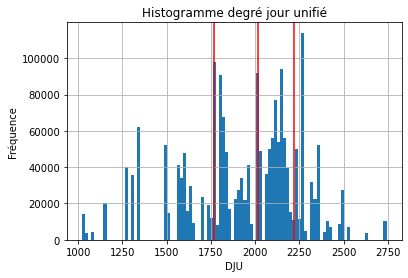

In [201]:
dju_lim = [1766.20, 2015.55, 2219.15]
ax = pop.DJU.hist(bins=100)
for lim in dju_lim:
    ax.axvline(x=lim, c='r')
plt.title("Histogramme degré jour unifié")
plt.ylabel("Fréquence")
plt.xlabel("DJU")

### define filosofi categories
- based on Marion's study in the natinal level

In [202]:
part_pauv_lim = [0.02, 0.18, 0.32]
part_prop_lim = [0.5, 0.75, 0.98]

In [203]:
pop.filosofi_part_pauvrete.describe()

count    1.961698e+06
mean     8.661546e-02
std      7.904570e-02
min      0.000000e+00
25%      3.030300e-02
50%      7.032100e-02
75%      1.250000e-01
max      8.108110e-01
Name: filosofi_part_pauvrete, dtype: float64

Text(0.5, 0, 'Taux de pauvreté')

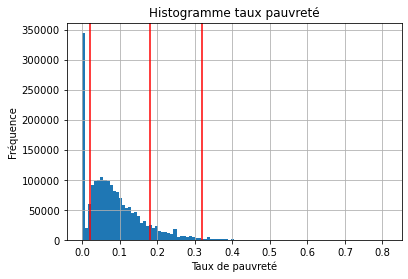

In [204]:
ax = pop.filosofi_part_pauvrete.hist(bins=100)
for lim in part_pauv_lim:
    ax.axvline(x=lim, c='r')
plt.title("Histogramme taux pauvreté")
plt.ylabel("Fréquence")
plt.xlabel("Taux de pauvreté")

Text(0.5, 0, 'Taux de propriétaire')

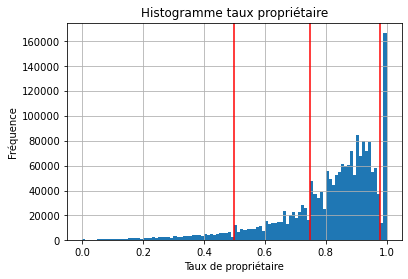

In [205]:
ax = pop.filosofi_part_proprietaire.hist(bins=100)
for lim in part_prop_lim:
    ax.axvline(x=lim, c='r')
plt.title("Histogramme taux propriétaire")
plt.ylabel("Fréquence")
plt.xlabel("Taux de propriétaire")

In [206]:
pop.dropna(subset=["filosofi_part_proprietaire"], inplace=True)
prop_relations = {        
    "niv_prop_1": (pop.filosofi_part_proprietaire < part_prop_lim[0]),
    "niv_prop_2": ((pop.filosofi_part_proprietaire >= part_prop_lim[0])&
              (pop.filosofi_part_proprietaire < part_prop_lim[1])),
    "niv_prop_3": ((pop.filosofi_part_proprietaire >= part_prop_lim[1])&
              (pop.filosofi_part_proprietaire < part_prop_lim[2])),
    "niv_prop_4": (pop.filosofi_part_proprietaire >= part_prop_lim[2])    
                }

prop_values = list(prop_relations.keys())
prop_conditions = list(prop_relations.values())

pop["class_prop"] = np.select(prop_conditions, prop_values, default=None)

In [207]:
pop.dropna(subset=["filosofi_part_pauvrete"], inplace=True)
pauv_relations = {        
    "niv_pauv_1": (pop.filosofi_part_pauvrete < part_pauv_lim[0]),
    "niv_pauv_2": ((pop.filosofi_part_pauvrete >= part_pauv_lim[0])&
              (pop.filosofi_part_pauvrete < part_pauv_lim[1])),
    "niv_pauv_3": ((pop.filosofi_part_pauvrete >= part_pauv_lim[1])&
              (pop.filosofi_part_pauvrete < part_pauv_lim[2])),
    "niv_pauv_4": (pop.filosofi_part_pauvrete >= part_pauv_lim[2])    
                }

pauv_values = list(pauv_relations.keys())
pauv_conditions = list(pauv_relations.values())

pop["class_pauv"] = np.select(pauv_conditions, pauv_values, default=None)

In [208]:
pauv_relations = {        
    "niv_pauv_1": (pop.filosofi_part_pauvrete < part_pauv_lim[0]),
    "niv_pauv_2": ((pop.filosofi_part_pauvrete >= part_pauv_lim[0])&
              (pop.filosofi_part_pauvrete < part_pauv_lim[1])),
    "niv_pauv_3": ((pop.filosofi_part_pauvrete >= part_pauv_lim[1])&
              (pop.filosofi_part_pauvrete < part_pauv_lim[2])),
    "niv_pauv_4": (pop.filosofi_part_pauvrete >= part_pauv_lim[2])    
                }

pauv_values = list(pauv_relations.keys())
pauv_conditions = list(pauv_relations.values())

pop["class_pauv"] = np.select(pauv_conditions, pauv_values, default=None)

### define if have dpe data 

In [209]:
cond_have_dpe = (pop.adedpe202006_logtype_ph_u.notnull())&(pop.adedpe202006_logtype_mur_u_ext.notnull())
pop["dpe_complete"] = np.where(cond_have_dpe, True, False)

## Chi square 

    - H0 : The two categorical variables have no relationship (independent)
    - H1 : There is a relationship (dependent) between two categorical variables

### define renovation category

In [210]:
samp = pop[pop.dpe_complete]

In [211]:
len(samp) /len(pop)

0.09456807316926459

In [212]:
samp["renovated_wall"] = samp.adedpe202006_logtype_mur_u_ext < u_wall_min
samp.head(2)

C:\Users\ldecarva\AppData\Local\Temp/ipykernel_19376/3662001061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp["renovated_wall"] = samp.adedpe202006_logtype_mur_u_ext < u_wall_min


,période,typologie,usage,territoire,carte_territoire_P1,carte_territoire_P2_P7,typologie_mapuce,typologie_mapuce_sigle,typologie_méthode_bdnb,quant_usage_bdnb_n1,...,cerffo2020_nb_gest,filosofi_part_proprietaire,filosofi_part_pauvrete,geometry_BDNB,DJU,class_dju,class_prop,class_pauv,dpe_complete,renovated_wall
archétype,,,,,,,,,,,,,,,,,,,,,
P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,1,...,NaN,0.740741,0.074074,"MULTIPOLYGON (((848435.3 6563026.1, 848445.2 6...",2159.017308,niv_dju_3,niv_prop_2,niv_pauv_2,True,False
P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,1,...,NaN,0.908333,0.000000,"MULTIPOLYGON (((848519.9 6562673.5, 848521.3 6...",2159.017308,niv_dju_3,niv_prop_3,niv_pauv_1,True,True


In [213]:
samp["renovated_roof"] = samp.adedpe202006_logtype_ph_u < u_roof_min
samp.head(2)

C:\Users\ldecarva\AppData\Local\Temp/ipykernel_19376/1827439796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp["renovated_roof"] = samp.adedpe202006_logtype_ph_u < u_roof_min


,période,typologie,usage,territoire,carte_territoire_P1,carte_territoire_P2_P7,typologie_mapuce,typologie_mapuce_sigle,typologie_méthode_bdnb,quant_usage_bdnb_n1,...,filosofi_part_proprietaire,filosofi_part_pauvrete,geometry_BDNB,DJU,class_dju,class_prop,class_pauv,dpe_complete,renovated_wall,renovated_roof
archétype,,,,,,,,,,,,,,,,,,,,,
P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,1,...,0.740741,0.074074,"MULTIPOLYGON (((848435.3 6563026.1, 848445.2 6...",2159.017308,niv_dju_3,niv_prop_2,niv_pauv_2,True,False,True
P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,1,...,0.908333,0.000000,"MULTIPOLYGON (((848519.9 6562673.5, 848521.3 6...",2159.017308,niv_dju_3,niv_prop_3,niv_pauv_1,True,True,True


In [214]:
[col for col in  samp.columns if "adedpe202006_logtype" in col]

['adedpe202006_logtype_min_classe_ener_ges',
 'adedpe202006_logtype_coherence_data_methode_dpe',
 'adedpe202006_logtype_is_3cl',
 'adedpe202006_logtype_ratio_ges_conso',
 'adedpe202006_logtype_ch_gen_lib',
 'adedpe202006_logtype_ecs_gen_lib',
 'adedpe202006_logtype_numero_dpe',
 'adedpe202006_logtype_avancee_masque_max',
 'adedpe202006_logtype_baie_fs',
 'adedpe202006_logtype_baie_mat',
 'adedpe202006_logtype_baie_orientation',
 'adedpe202006_logtype_baie_remplissage',
 'adedpe202006_logtype_baie_type_vitrage',
 'adedpe202006_logtype_baie_u',
 'adedpe202006_logtype_ch_gen_lib_appoint',
 'adedpe202006_logtype_ch_gen_lib_princ',
 'adedpe202006_logtype_ch_is_solaire',
 'adedpe202006_logtype_ch_type_ener_corr',
 'adedpe202006_logtype_ch_type_inst',
 'adedpe202006_logtype_classe_conso_ener',
 'adedpe202006_logtype_classe_estim_ges',
 'adedpe202006_logtype_conso_ener',
 'adedpe202006_logtype_traversant',
 'adedpe202006_logtype_date_reception_dpe',
 'adedpe202006_logtype_ecs_gen_lib_appoint',

### test by hand 

In [215]:
cont_tab = pd.crosstab(samp.renovated_wall, samp.class_pauv, margins = True)
cont_tab

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4,All
renovated_wall,,,,,
False,23848,86204,11137,1839,123028
True,13518,43299,4983,686,62486
All,37366,129503,16120,2525,185514


In [216]:
observed = cont_tab.iloc[0:2,0:4]
observed

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_wall,,,,
False,23848,86204,11137,1839
True,13518,43299,4983,686


In [217]:
expected =  np.outer(cont_tab["All"][0:2],
                     cont_tab.loc["All"][0:4]) / len(samp)
expected = pd.DataFrame(expected)
expected.columns = cont_tab.columns[:-1]
expected.index = cont_tab.index[:-1]
expected

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_wall,,,,
False,24780.14731,85882.979635,10690.359542,1674.513514
True,12585.85269,43620.020365,5429.640458,850.486486


In [218]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
chi_squared_stat

211.035086783437

In [219]:
critical_value = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3) 
critical_value

7.814727903251179

In [220]:
p_value = 1 - chi2.cdf(x=chi_squared_stat,  df=8)
p_value

0.0

### Wall - Is renovated x other variables

In [221]:
help(chi2_contingency)
# use the function chi2_contingency that takes as input a contingency table and applies the chi-square test on it

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

#### test pauvreté

In [265]:
obs_pauv = pd.crosstab(samp.renovated_wall, samp.class_pauv)
obs_pauv

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_wall,,,,
False,23848,86204,11137,1839
True,13518,43299,4983,686


In [266]:
chi2_pauv, p_pauv, dof_pauv, exp_pauv = chi2_contingency(obs_pauv)
p_pauv

1.7396987453742837e-45

In [267]:
v_pauv = np.sqrt(chi2_pauv/ (len(samp)* dof_pauv))
v_pauv

0.01947279812155676

#### test proprietaire

In [268]:
obs_prop = pd.crosstab(samp.renovated_wall, samp.class_prop)
obs_prop

class_prop,niv_prop_1,niv_prop_2,niv_prop_3,niv_prop_4
renovated_wall,,,,
False,11698,24106,77531,9693
True,5204,11678,39837,5767


In [269]:
chi2_prop, p_prop, dof_prop, exp_prop = chi2_contingency(obs_prop)
p_prop

9.724813683666846e-38

In [270]:
v_prop = np.sqrt(chi2_prop/ (len(samp)* dof_prop))
v_prop

0.017741246721288156

#### test DJU

In [271]:
obs_dju = pd.crosstab(samp.renovated_wall, samp.class_dju)
obs_dju

class_dju,niv_dju_1,niv_dju_2,niv_dju_3,niv_dju_4
renovated_wall,,,,
False,32923,34596,38367,17142
True,12985,14814,19963,14724


In [272]:
chi2_dju, p_dju, dof_dju, exp_dju = chi2_contingency(obs_dju)
p_dju

0.0

In [273]:
v_dju = np.sqrt(chi2_dju/ (len(samp)* dof_dju))
v_dju

0.07519427058344157

#### conclusions

- Finally, we get a p-value close to zero for all variables, which is much lower than a threshold of 0.5. 
- Therefore, we will reject the null hypothesis that says there is no relationship between the features. 
- The test result detects a significant relationship between the variables.
- However all of them presented a small effect size, so this influence might not be practically relevant (see explanation below)

 For the chi-square test, the Cramer’s V effect size is considered small if V = 0.10, medium if V = 0.30, and large if V = 0.50. An effect size index represents the magnitude of an effect, independent of sample size. Formula of Cramer's size of effect on 
https://www.real-statistics.com/chi-square-and-f-distributions/effect-size-chi-square/

Effect size tells you how meaningful the relationship between variables or the difference between groups is. It indicates the practical significance of a research outcome. A large effect size means that a research finding has practical significance, while a small effect size indicates limited practical applications.

While statistical significance shows that an effect exists in a study, practical significance shows that the effect is large enough to be meaningful in the real world. Statistical significance is denoted by p values, whereas practical significance is represented by effect sizes.

Statistical significance alone can be misleading because it’s influenced by the sample size. Increasing the sample size always makes it more likely to find a statistically significant effect, no matter how small the effect truly is in the real world.

In contrast, effect sizes are independent of the sample size. Only the data is used to calculate effect sizes. 
( https://www.scribbr.com/statistics/effect-size/ )

#### Resume tables

In [231]:
pauv = ["Taux de pauvrété",chi2_pauv, p_pauv, v_pauv]
prop = ["Taux de proprietaire",chi2_prop, p_prop, v_prop]
dju = ["Degré jour unifié", chi2_dju, p_dju, v_dju]
reno_conv_wall = pd.DataFrame([pauv,prop, dju])
reno_conv_wall.columns = ["Variable catégorique", 
                     "statistique ${\chi}^2$", "valeur-p", "taille d'effet"]
reno_conv_wall.set_index("Variable catégorique", inplace=True)
reno_conv_wall

,statistique ${\chi}^2$,valeur-p,taille d'effet
Variable catégorique,,,
Taux de pauvrété,211.035087,1.739699e-45,0.019473
Taux de proprietaire,175.172616,9.724814e-38,0.017741
Degré jour unifié,3146.787715,0.000000e+00,0.075194


### Roof - Is renovated x other variables

#### test pauvreté

In [295]:
obs_pauv = pd.crosstab(samp.renovated_roof, samp.class_pauv)
obs_pauv

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_roof,,,,
False,9541,36288,5142,963
True,27825,93215,10978,1562


In [296]:
chi2_pauv, p_pauv, dof_pauv, exp_pauv = chi2_contingency(obs_pauv)
p_pauv

2.23346223740224e-78

In [297]:
v_pauv = np.sqrt(chi2_pauv/ (len(samp)* dof_pauv))
v_pauv

0.025540595399562206

#### test proprietaire

In [298]:
obs_prop = pd.crosstab(samp.renovated_roof, samp.class_prop)
obs_prop

class_prop,niv_prop_1,niv_prop_2,niv_prop_3,niv_prop_4
renovated_roof,,,,
False,5037,10632,32346,3919
True,11865,25152,85022,11541


In [299]:
chi2_prop, p_prop, dof_prop, exp_prop = chi2_contingency(obs_prop)
p_prop

4.2632074696353785e-31

In [300]:
v_prop = np.sqrt(chi2_prop/ (len(samp)* dof_prop))
v_prop

0.016107456675075918

#### test DJU

In [301]:
obs_dju = pd.crosstab(samp.renovated_roof, samp.class_dju)
obs_dju

class_dju,niv_dju_1,niv_dju_2,niv_dju_3,niv_dju_4
renovated_roof,,,,
False,14884,13056,15959,8035
True,31024,36354,42371,23831


In [302]:
chi2_dju, p_dju, dof_dju, exp_dju = chi2_contingency(obs_dju)
p_dju

1.609445493345392e-138

In [303]:
v_dju = np.sqrt(chi2_dju/ (len(samp)* dof_dju))
v_dju

0.0339262787235909

#### Resume table

In [286]:
pauv = ["Taux de pauvrété",chi2_pauv, p_pauv, v_pauv]
prop = ["Taux de proprietaire",chi2_prop, p_prop, v_prop]
dju = ["Degré jour unifié", chi2_dju, p_dju, v_dju]
reno_conv_roof = pd.DataFrame([pauv,prop, dju])
reno_conv_roof.columns = ["Variable catégorique", 
                     "statistique ${\chi}^2$", "valeur-p", "taille d'effet"]
reno_conv_roof.set_index("Variable catégorique", inplace=True)


In [287]:
pd.concat([reno_conv_wall,reno_conv_roof]).to_excel("resume_chi2.xlsx")

### Have DPE x other variables

#### test pauvreté

In [243]:
obs_pauv_pop = pd.crosstab(pop.dpe_complete, pop.class_pauv)
obs_pauv_pop

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
dpe_complete,,,,
False,349352,1216405,181583,28844
True,37366,129503,16120,2525


In [244]:
chi2_pauv_pop, p_pauv_pop, dof_pauv_pop, exp_pauv_pop = chi2_contingency(obs_pauv_pop)
p_pauv_pop

8.009621222730552e-114

In [245]:
v_pauv_pop = np.sqrt(chi2_pauv_pop/ (len(pop)* dof_pauv_pop))
v_pauv_pop

0.009459823704646307

#### test proprietaire

In [246]:
obs_prop_pop = pd.crosstab(pop.dpe_complete, pop.class_prop)
obs_prop_pop

class_prop,niv_prop_1,niv_prop_2,niv_prop_3,niv_prop_4
dpe_complete,,,,
False,115379,333545,1162439,164821
True,16902,35784,117368,15460


In [247]:
chi2_prop_pop, p_prop_pop, dof_prop_pop, exp_prop_pop = chi2_contingency(obs_prop_pop)
p_prop_pop

0.0

In [248]:
v_prop_pop = np.sqrt(chi2_prop_pop/ (len(pop)* dof_prop_pop))
v_prop_pop

0.018492133345432697

#### test DJU

In [249]:
obs_dju_pop = pd.crosstab(pop.dpe_complete, pop.class_dju)
obs_dju_pop

class_dju,niv_dju_1,niv_dju_2,niv_dju_3,niv_dju_4
dpe_complete,,,,
False,488242,452293,501323,334326
True,45908,49410,58330,31866


In [250]:
chi2_dju_pop, p_dju_pop, dof_dju_pop, exp_dju_pop = chi2_contingency(obs_dju_pop)
p_dju_pop

9.50978507400414e-305

In [251]:
v_dju_pop = np.sqrt(chi2_dju_pop/ (len(pop)* dof_dju_pop))
v_dju_pop

0.015461458942040688

#### conclusions

The conclusions are similar than from the previous section. Although there is an statistical significant difference among the tested groups, the effect size is small in all of them.


### Study of the variations

The chi-square test is an overall test for detecting relationships between two
categorical variables. If the test is significant, it is important to look at the data to
learn the nature of the relationship. There are three ways to look at the data:

1) Compare selected percents: which cells occur in very different percentages
than the other cells?

2) Compare observed and expected cell counts: which cells have more or less observations than would be expected if H0 were true?

3) Look at the terms of the chi-square statistic: which cells contribute the most to the value of λ2?

(https://www.westga.edu/academics/research/vrc/assets/docs/ChiSquareTest_LectureNotes.pdf)

#### 1 compare percents 

##### pauvreté

In [304]:
(pd.DataFrame(exp_pauv) /exp_pauv.sum().sum() *100).round(1)

,0,1,2,3
0,5.6,19.5,2.4,0.4
1,14.5,50.3,6.3,1.0


In [305]:
(pd.DataFrame(obs_pauv) /obs_pauv.sum().sum() *100).round(1)

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_roof,,,,
False,5.1,19.6,2.8,0.5
True,15.0,50.2,5.9,0.8


    We can see that the richest has more renovation than expected and less non renovation than expected.
    The poorest has the exactily opposite behaviour

In [306]:
perc_reno_pauv = pd.DataFrame(obs_pauv) /obs_pauv.sum()
perc_reno_pauv

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_roof,,,,
False,0.255339,0.28021,0.318983,0.381386
True,0.744661,0.71979,0.681017,0.618614


(array([0, 1, 2, 3]),
 [Text(0, 0, 'niv_pauv_1'),
  Text(1, 0, 'niv_pauv_2'),
  Text(2, 0, 'niv_pauv_3'),
  Text(3, 0, 'niv_pauv_4')])

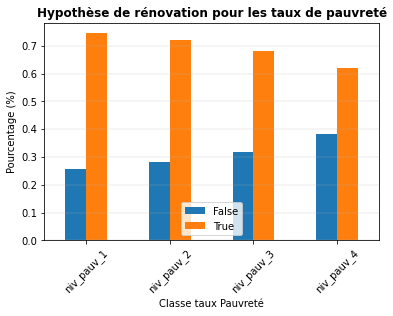

In [307]:
ax = perc_reno_pauv.T.plot.bar()
ax.legend(loc=8)
ax.grid('on',which='major', axis='y', linestyle='-', linewidth=0.25, )
plt.xlabel("Classe taux Pauvreté")
plt.ylabel("Pourcentage (%)")
plt.title("Hypothèse de rénovation pour les taux de pauvreté",fontweight="bold")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

##### propriétaire

(array([0, 1, 2, 3]),
 [Text(0, 0, 'niv_prop_1'),
  Text(1, 0, 'niv_prop_2'),
  Text(2, 0, 'niv_prop_3'),
  Text(3, 0, 'niv_prop_4')])

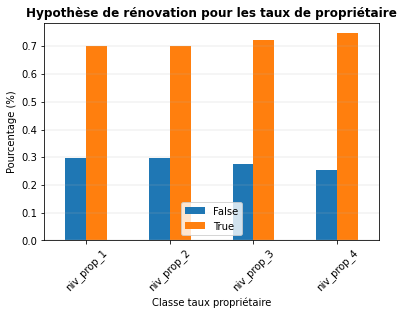

In [309]:
perc_reno_prop = pd.DataFrame(obs_prop) /obs_prop.sum()
ax = perc_reno_prop.T.plot.bar()
ax.legend(loc=8)
ax.grid('on',which='major', axis='y', linestyle='-', linewidth=0.25, )
plt.xlabel("Classe taux propriétaire")
plt.ylabel("Pourcentage (%)")
plt.title("Hypothèse de rénovation pour les taux de propriétaire",fontweight="bold")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

(array([0, 1, 2, 3]),
 [Text(0, 0, 'niv_dju_1'),
  Text(1, 0, 'niv_dju_2'),
  Text(2, 0, 'niv_dju_3'),
  Text(3, 0, 'niv_dju_4')])

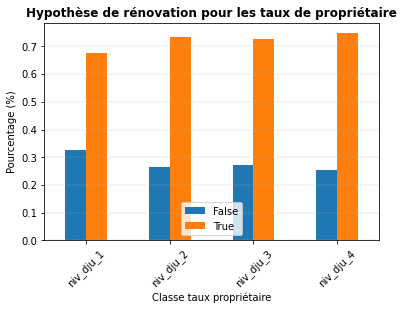

In [310]:
perc_reno_dju = pd.DataFrame(obs_dju) /obs_dju.sum()
ax = perc_reno_dju.T.plot.bar()
ax.legend(loc=8)
ax.grid('on',which='major', axis='y', linestyle='-', linewidth=0.25, )
plt.xlabel("Classe taux propriétaire")
plt.ylabel("Pourcentage (%)")
plt.title("Hypothèse de rénovation pour les taux de propriétaire",fontweight="bold")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

#### 2 Check which values are above and which are below the expected

In [257]:
obs_pauv-exp_pauv

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_wall,,,,
False,-932.14731,321.020365,446.640458,164.486486
True,932.14731,-321.020365,-446.640458,-164.486486


In [258]:
obs_prop-exp_prop

class_prop,niv_prop_1,niv_prop_2,niv_prop_3,niv_prop_4
renovated_roof,,,,
False,305.343802,614.39348,-510.763975,-408.973307
True,-305.343802,-614.39348,510.763975,408.973307


While only the richest category had better results than expected, the 2 higher levels of proprietaire had better results than expected

#### 3 Contribution of each term to chi2

In [259]:
(((obs_pauv-exp_pauv)**2)/exp_pauv)

class_pauv,niv_pauv_1,niv_pauv_2,niv_pauv_3,niv_pauv_4
renovated_wall,,,,
False,35.064304,1.199936,18.660523,16.157412
True,69.037723,2.362541,36.740499,31.812151


In [260]:
(((obs_prop-exp_prop)**2)/exp_prop)

class_prop,niv_prop_1,niv_prop_2,niv_prop_3,niv_prop_4
renovated_roof,,,,
False,19.704483,37.681591,7.939913,38.646071
True,7.660822,14.650065,3.086925,15.025042


The richest and in places with more house owners are those contributing the most to the difference of the expected